# Ejemplo 2: Pima Indian Diabetes 

Este es un dataset de Kaggle que pueden encontrar [acá](https://www.kaggle.com/uciml/pima-indians-diabetes-database). El objetivo es determinar si alguien tiene o no diabetes a partir de ciertas medidas diagnósticas en el dataset. Todas las pacientes son mujeres mayores a 21 años. 

Instancias: 768 

Atributos: 8 + variable clasificadora
1. Number of times pregnant
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
1. Diastolic blood pressure (mm Hg)
1. Triceps skin fold thickness (mm)
1. 2-Hour serum insulin (mu U/ml)
1. Body mass index (weight in kg/(height in m)^2)
1. Diabetes pedigree function
1. Age (years)
1. Class variable (0 or 1)





In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
data = pd.read_csv("../../../Z_datasets/pima-indians-diabetes.data.csv", header=0)
data.columns = ["embarazos",
                "glucosa",
                "presion_art",
                "piel_ancho",
                "insulina",
                "bmi",
                "pedigree",
                "edad",
                "clase"]
data.shape

(767, 9)

In [11]:
data.head()


,embarazos,glucosa,presion_art,piel_ancho,insulina,bmi,pedigree,edad,clase
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   embarazos    767 non-null    int64  
 1   glucosa      767 non-null    int64  
 2   presion_art  767 non-null    int64  
 3   piel_ancho   767 non-null    int64  
 4   insulina     767 non-null    int64  
 5   bmi          767 non-null    float64
 6   pedigree     767 non-null    float64
 7   edad         767 non-null    int64  
 8   clase        767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [14]:
data.isnull().sum()

embarazos      0
glucosa        0
presion_art    0
piel_ancho     0
insulina       0
bmi            0
pedigree       0
edad           0
clase          0
dtype: int64

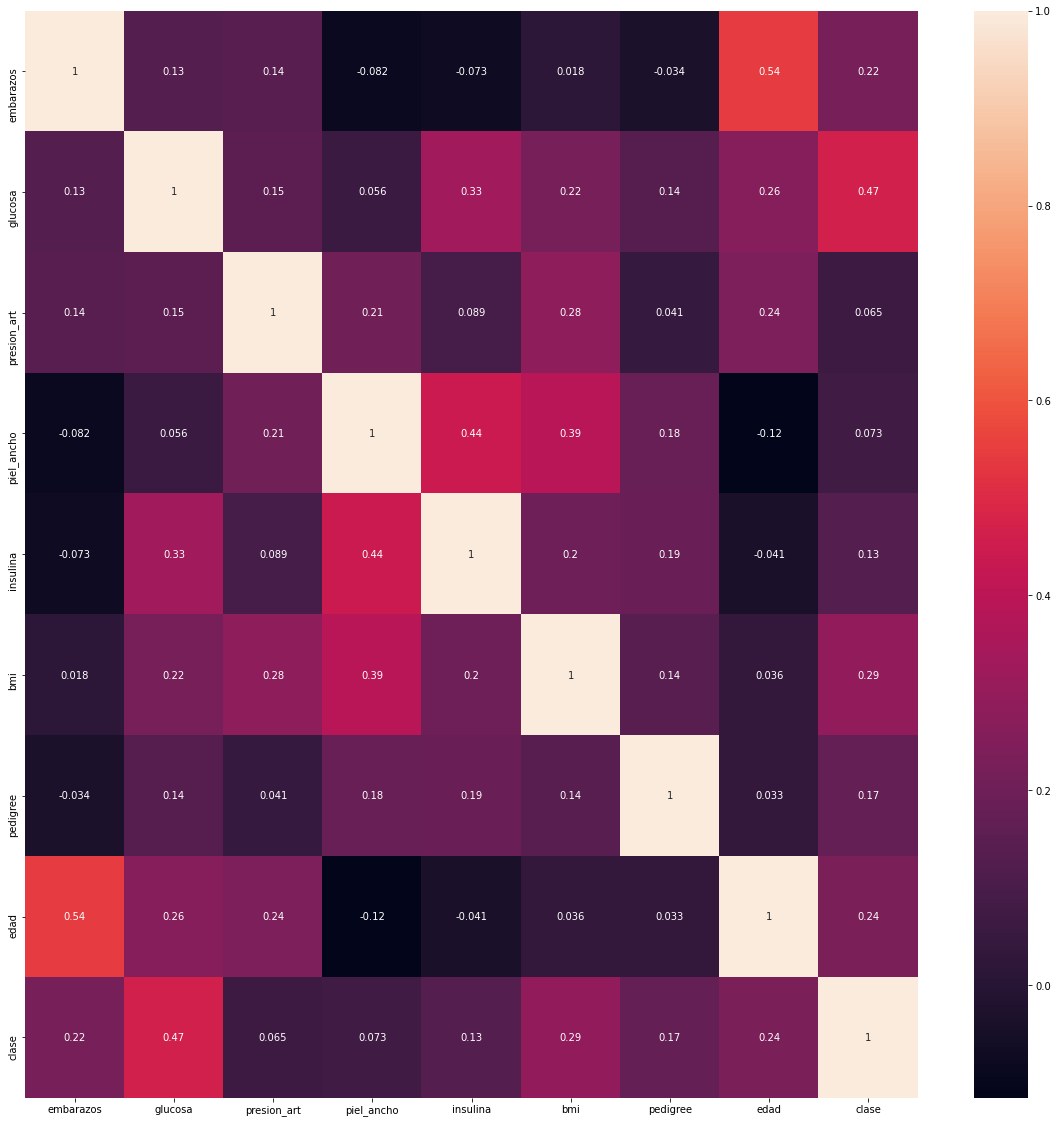

In [16]:
corr_ds = data.corr()
top_corr = corr_ds.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr].corr(), annot = True)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='clase', ylabel='count'>

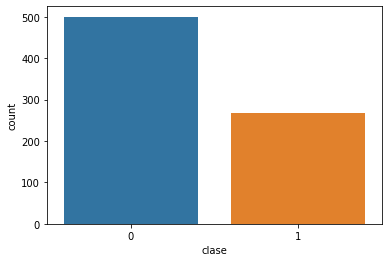

In [17]:
sns.countplot(data['clase'])

## Pretratamiento

Separamos nuestro conjunto de datos en entrenamiento y prueba

In [29]:
cols_datos = ["embarazos",
                "glucosa",
                "presion_art",
                "piel_ancho",
                "insulina",
                "bmi",
                "pedigree",
                "edad"]
X = data[cols_datos]
y = data['clase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


## Modelo


Definimos el modelo secuencial

In [37]:
def genera_modelo(arquitectura, indim=8):
    model = Sequential()
    nh1, act1 = arquitectura[0]
    model.add(Dense(nh1, input_dim=indim, activation=act1))
    for capa in arquitectura[1:]:
        model.add(Dense(capa[0], activation=capa[1]))
    return model

modelo = genera_modelo([(12,'relu'), (8,'relu'), (1,'sigmoid')])
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


Ahora vamos a compilar el modelo usando como función de pérdida la función `binary_crossentropy` debido a que estamos clasificando dos clases. El optimizador a usar es `adam` y la métrica de evaluación va a ser `accuracy`.


In [39]:
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Entrenamiento y evaluación

Una vez compilado el modelo, podemos entrenarlo

In [40]:
model.fit(X_train, y_train, epochs=200, batch_size=25)

Epoch 1/200
25/25 [==============================] - 1s 951us/step - loss: 8.2411 - accuracy: 0.2489
Epoch 2/200
25/25 [==============================] - 0s 989us/step - loss: 8.3004 - accuracy: 0.2314
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 8.3631 - accuracy: 0.2385
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 8.1691 - accuracy: 0.2319
Epoch 5/200
25/25 [==============================] - 0s 910us/step - loss: 8.2167 - accuracy: 0.2607
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 8.3290 - accuracy: 0.2464
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 8.1246 - accuracy: 0.2458
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 8.2667 - accuracy: 0.2491
Epoch 9/200
25/25 [==============================] - 0s 793us/step - loss: 8.2976 - accuracy: 0.2300
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 8.4669 - accuracy: 0.2370
E

25/25 [==============================] - 0s 1ms/step - loss: 8.0271 - accuracy: 0.2488
Epoch 83/200
25/25 [==============================] - 0s 936us/step - loss: 8.4638 - accuracy: 0.2137
Epoch 84/200
25/25 [==============================] - 0s 791us/step - loss: 8.4787 - accuracy: 0.2379
Epoch 85/200
25/25 [==============================] - 0s 931us/step - loss: 8.2120 - accuracy: 0.2288
Epoch 86/200
25/25 [==============================] - 0s 834us/step - loss: 8.1816 - accuracy: 0.2541
Epoch 87/200
25/25 [==============================] - 0s 687us/step - loss: 7.8549 - accuracy: 0.2800
Epoch 88/200
25/25 [==============================] - 0s 1ms/step - loss: 8.2751 - accuracy: 0.2555
Epoch 89/200
25/25 [==============================] - 0s 965us/step - loss: 8.3626 - accuracy: 0.2372
Epoch 90/200
25/25 [==============================] - 0s 781us/step - loss: 8.3750 - accuracy: 0.2222
Epoch 91/200
25/25 [==============================] - 0s 716us/step - loss: 8.2875 - accuracy: 0.23

25/25 [==============================] - 0s 2ms/step - loss: 8.2300 - accuracy: 0.2210
Epoch 163/200
25/25 [==============================] - 0s 962us/step - loss: 8.5555 - accuracy: 0.2110
Epoch 164/200
25/25 [==============================] - 0s 974us/step - loss: 8.2631 - accuracy: 0.2624
Epoch 165/200
25/25 [==============================] - 0s 689us/step - loss: 8.2234 - accuracy: 0.2471
Epoch 166/200
25/25 [==============================] - 0s 1ms/step - loss: 8.4460 - accuracy: 0.2345
Epoch 167/200
25/25 [==============================] - 0s 991us/step - loss: 8.3258 - accuracy: 0.2314
Epoch 168/200
25/25 [==============================] - 0s 972us/step - loss: 8.5200 - accuracy: 0.2370
Epoch 169/200
25/25 [==============================] - 0s 2ms/step - loss: 8.1439 - accuracy: 0.2417
Epoch 170/200
25/25 [==============================] - 0s 1ms/step - loss: 8.2450 - accuracy: 0.2498
Epoch 171/200
25/25 [==============================] - 0s 964us/step - loss: 8.3862 - accuracy:

In [41]:
accuracy = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 8.8139 - accuracy: 0.2143


In [55]:
print("Accuracy {0:2f} ".format(accuracy[1]*100))

Accuracy 21.428572 
